In [1]:
import pandas as pd
top3topicsong = pd.read_csv('top3topics_allsongs.csv', sep='\t', index_col=0)
top3topicsong.head()

,incnormid,recordid,bronid,w_g,herdrukid,year,top1,top2,top3
0,4.0,118999,1001206,wereldlijk,NaN,1745.0,topic 45,topic 23,topic 29
1,7.0,111832,1001390,wereldlijk,NaN,1745.0,topic 23,topic 38,topic 11
2,7.0,136573,1001829,wereldlijk,NaN,1746.0,topic 23,topic 38,topic 11
3,13.0,19499,1000978,wereldlijk,NaN,1677.0,topic 34,topic 11,topic 38
4,53.0,20031,1001550,wereldlijk,928216.0,1654.0,topic 43,topic 45,topic 19


In [2]:
import numpy as np

groups = top3topicsong.groupby('year')

year2index = {year: i for i, year in enumerate(sorted(top3topicsong.year.unique()))}
X = np.zeros((top3topicsong.year.unique().size, 50))
counts = groups['top1'].value_counts()
for (year, topic), count in counts.iteritems():
    topic = int(topic.replace('topic ', ''))
    X[year2index[year], topic] += count
turnovertop1 = np.array([x[::-1] for x in X.argsort(1)])

In [28]:
year2index

{1550.0: 0,
 1551.0: 1,
 1552.0: 2,
 1553.0: 3,
 1554.0: 4,
 1556.0: 5,
 1557.0: 6,
 1558.0: 7,
 1559.0: 8,
 1560.0: 9,
 1561.0: 10,
 1562.0: 11,
 1563.0: 12,
 1564.0: 13,
 1565.0: 14,
 1566.0: 15,
 1567.0: 16,
 1568.0: 17,
 1569.0: 18,
 1570.0: 19,
 1571.0: 20,
 1572.0: 21,
 1573.0: 22,
 1574.0: 23,
 1575.0: 24,
 1576.0: 25,
 1577.0: 26,
 1578.0: 27,
 1579.0: 28,
 1580.0: 29,
 1581.0: 30,
 1582.0: 31,
 1583.0: 32,
 1584.0: 33,
 1585.0: 34,
 1586.0: 35,
 1587.0: 36,
 1588.0: 37,
 1589.0: 38,
 1590.0: 39,
 1591.0: 40,
 1592.0: 41,
 1593.0: 42,
 1594.0: 43,
 1595.0: 44,
 1596.0: 45,
 1597.0: 46,
 1598.0: 47,
 1599.0: 48,
 1600.0: 49,
 1601.0: 50,
 1602.0: 51,
 1603.0: 52,
 1604.0: 53,
 1605.0: 54,
 1607.0: 55,
 1608.0: 56,
 1609.0: 57,
 1610.0: 58,
 1611.0: 59,
 1612.0: 60,
 1613.0: 61,
 1614.0: 62,
 1615.0: 63,
 1616.0: 64,
 1617.0: 65,
 1618.0: 66,
 1619.0: 67,
 1620.0: 68,
 1621.0: 69,
 1622.0: 70,
 1623.0: 71,
 1624.0: 72,
 1625.0: 73,
 1626.0: 74,
 1627.0: 75,
 1628.0: 76,
 1629.0: 

In [3]:
df_turnovertop1 = pd.DataFrame(turnovertop1)

In [4]:
df_turnovertop1.shape

(196, 50)

In [10]:
cutoff3 = df_turnovertop1.iloc[:,0:3]

In [11]:
cutoff3.head()

,0,1,2
0,9,2,49
1,41,2,37
2,9,31,0
3,21,9,49
4,2,9,49


In [5]:
cutoff5 = df_turnovertop1[[0, 1, 2, 3, 4]].copy()
cutoff10 = df_turnovertop1[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].copy()

In [65]:
cutoff.shape

(196, 5)

In [19]:
cutoff.apply(set, axis=1).head()

0     {2, 9, 13, 49, 22}
1     {2, 37, 41, 9, 24}
2       {0, 2, 6, 9, 31}
3    {9, 12, 49, 21, 22}
4     {2, 9, 13, 49, 22}
dtype: object

In [30]:
def turnover1(df):

    df = df.apply(set, axis=1)
    turnovers = {}
    for year in range(df.index.min() + 1, df.index.max() + 1):
        name_set, prior_name_set = df.loc[year], df.loc[year - 1]
        turnovers[year] = len(name_set.difference(prior_name_set))
    return pd.Series(turnovers)

In [47]:
turnover_topics_5 = turnover1(cutoff5)

In [48]:
turnover_topics_5

1      3
2      3
3      4
4      2
5      3
6      2
7      0
8      1
9      4
10     3
11     3
12     1
13     3
14     3
15     2
16     1
17     2
18     3
19     1
20     3
21     2
22     1
23     2
24     3
25     3
26     3
27     3
28     2
29     2
30     3
      ..
166    3
167    3
168    2
169    5
170    5
171    5
172    5
173    4
174    5
175    5
176    2
177    4
178    4
179    5
180    5
181    4
182    3
183    4
184    4
185    5
186    3
187    4
188    5
189    5
190    2
191    1
192    3
193    4
194    4
195    4
Length: 195, dtype: int64

In [49]:
np.mean(turnover_topics_5)

3.5692307692307694

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

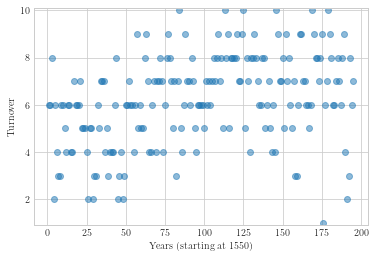

In [102]:
turnover_topics_10.plot(style='o', ylim=(0.9, 10.1), alpha = 0.5)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
plt.savefig('annualturnover10.pdf')

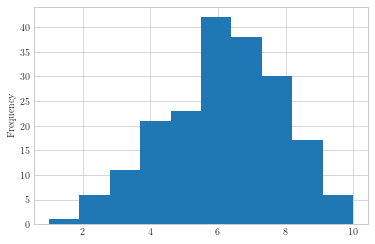

In [49]:
turnover_topics_10.plot(kind='hist')
plt.savefig('histturnover10.pdf')

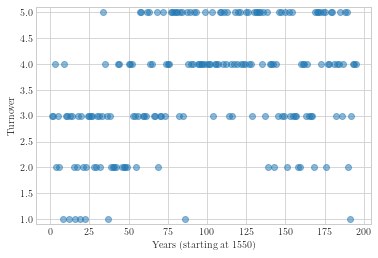

In [103]:
turnover_topics_5.plot(style='o', ylim=(0.9, 5.1), alpha = 0.5)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
plt.savefig('annualturnover5.pdf')

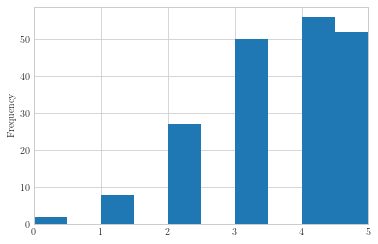

In [51]:
turnover_topics_5.plot(kind='hist', xlim=(0, 5))
plt.savefig('histturnover5.pdf')

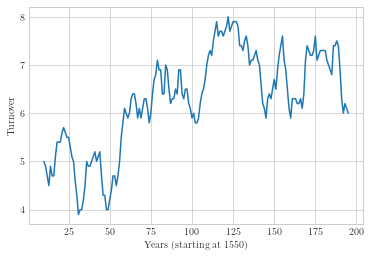

In [96]:
tt_rm_10 = turnover_topics_10.rolling(10).mean()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
tt_rm_10.plot()

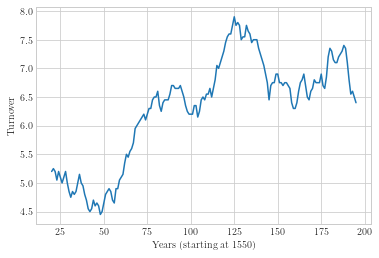

In [95]:
tt_rm_10x = turnover_topics_10.rolling(20).mean()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
tt_rm_10x.plot()
plt.savefig('rolling10.pdf')

In [26]:
complete = turnover(df_turnovertop1)

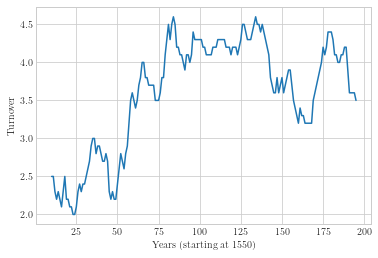

In [94]:
tt_rm_5 = turnover_topics_5.rolling(10).mean()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
tt_rm_5.plot()

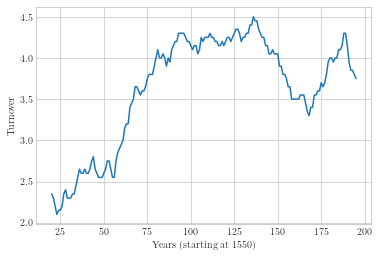

In [93]:
tt_rm_5x = turnover_topics_5.rolling(20).mean()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel('Turnover')
plt.xlabel('Years (starting at 1550)')
tt_rm_5x.plot()
plt.savefig('rolling5.pdf')

In [78]:
max_y = 10 # of wat dan ook
scores = []
for i in range(max_y): # loop over al de posities
    avg_turnover = np.mean(turnovers(i)) # bereken alle turnovers met i als topsize en neem de mean
    scores.append(avg_turnover)
(range(max_y), scores).plt() # plot

AttributeError: 'tuple' object has no attribute 'plt'

In [64]:
np.mean([1, 4, 3, 6])

3.5

In [39]:
def slicing(i):
    cutoff = df_turnovertop1.iloc[:,0:i]
    return cutoff

def turnover(i):
    cutoff = slicing(i)
    turnco = cutoff.apply(set, axis = 1)
    turnovers = {}
    for year in range(turnco.index.min() + 1, turnco.index.max() + 1):
        name_set, prior_name_set = turnco.loc[year], turnco.loc[year - 1]
        turnovers[year] = len(name_set.difference(prior_name_set))
    return pd.Series(turnovers)

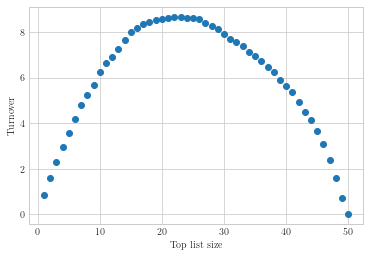

In [106]:
max_y = 51  # of wat dan ook
scores = []
for i in range(1, max_y): # loop over al de posities
    avg_turnover = np.mean(turnover(i)) # bereken alle turnovers met i als topsize en neem de mean
    scores.append(avg_turnover)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel('Top list size')
plt.ylabel('Turnover')
plt.plot(range(1, max_y), scores, 'o') # plot
plt.savefig('turnoverbias51.pdf')

In [50]:
max_y = 5 # of wat dan ook
scores = []
for i in range(max_y): # loop over al de posities
    avg_turnover = np.mean(turnover(i)) # bereken alle turnovers met i als topsize en neem de mean
    scores.append(avg_turnover)
(range(max_y), scores).plt() # plot

AttributeError: 'numpy.float64' object has no attribute 'difference'